<a href="https://colab.research.google.com/github/TeigenMillies/MAT422/blob/main/2_3_Independent_Variables_and_Random_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3 Independent Variables and Random Samples
---------------------------------------------------------
- Joint probability distributions
- Correlation and dependence
- Random samples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# 2.3.1 Joint probability distributions
Joint probability is the probability of two or more events
happening together. A joint probability distribution shows a probability distribution for two (or more) random variables.

The probability mass function (pmf) of a single discrete random variable X can be extended to two variables X,Y for describing how much probability mass is placed on each possible pair of values (x, y).

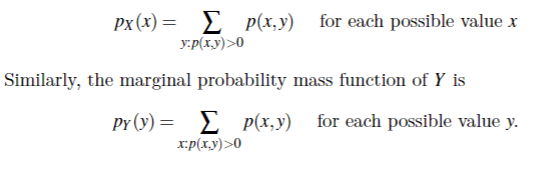

The joint continuous distribution is the continuous analogue of a joint discrete distribution. For that reason, all of the conceptual ideas will be equivalent, and the formulas will be the continuous counterparts of the discrete formulas. The probability that the pair (X,Y ) of continuous random variable’s falls in a two-dimensional set A (such as a rectangle) is obtained by integrating a function called the joint density function.

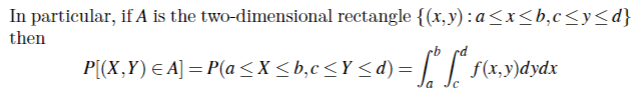

The concept of independent random variables is very similar to independent
events. In many situations, information about the observed value of one of the
two variables X and Y gives information about the value of the other variable.
Independent random variables describe a situation where the occurrence of
one does not affect the probability of occurrence of the other (equivalently,
does not affect the odds). One way of defining independence of two events is
via the condition P(A ∩ B) = P(A) · P(B).

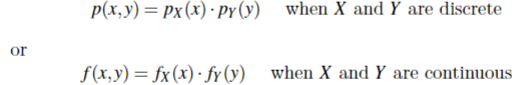

In [3]:
# Define random variables X and Y with probability distributions
X = np.array([1, 2])
P_X = np.array([0.4, 0.6])

Y = np.array([3, 4])  # Possible values of Y
P_Y = np.array([0.7, 0.3])  # Probabilities of Y

# Joint probability distribution matrix P(X, Y) (assuming independence)
P_XY = np.outer(P_X, P_Y)

# Show the joint probability distribution as a DataFrame for clarity
jd = pd.DataFrame(P_XY, index=X, columns=Y)

# Calculate the marginal probabilities from the joint distribution
marginal_X = np.sum(P_XY, axis=1)  # Sum over rows to get P(X)
marginal_Y = np.sum(P_XY, axis=0)  # Sum over columns to get P(Y)

# Verify independence by checking if P(X, Y) = P(X) * P(Y) for all pairs (x, y)
independent_check = np.allclose(P_XY, np.outer(marginal_X, marginal_Y))

# Results
print("Joint Probability Distribution P(X, Y):")
print(jd)
print("\nMarginal Probability P(X):", marginal_X)
print("Marginal Probability P(Y):", marginal_Y)
print("Are X and Y independent?", independent_check)


Joint Probability Distribution P(X, Y):
      3     4
1  0.28  0.12
2  0.42  0.18

Marginal Probability P(X): [0.4 0.6]
Marginal Probability P(Y): [0.7 0.3]
Are X and Y independent? True


# 2.3.2. Correlation and dependence
Correlations are useful because they can indicate a predictive relationship that can be exploited in practice. Covariance is a measure of the joint variability of two random variables.

Let X and Y be jointly distributed random variable’s with pmf p(x, y) or pdf f(x, y) according to whether the variables are discrete or continuous. The covariance between two random variable’s X and Y is

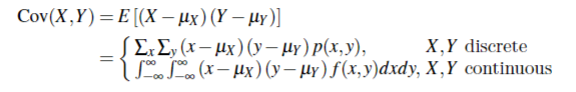


Three cases when the covriance is positive, negative, and near zero. Since X − μX and Y − μY are the deviations of the two variables from their respective mean values, the covariance is the expected product of deviations. Correlation coeﬀicient is the covariance of the two variables divided by the product of their standard deviations, which is a measure of linear correlation between two variables or sets of data.

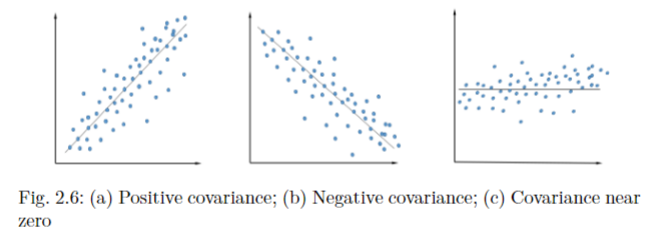

The correlation coeﬀicient of X and Y, denoted by Corr(X,Y ), ρX,Y , or just ρ, is defined by

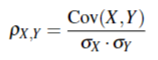

Correlation coeﬀicient, when applied to a sample, is commonly represented by rxy and may be referred to as the sample correlation coeﬀicient or the sample Pearson correlation coeﬀicient. We can obtain a formula for rxy by substituting estimates of the covariances and variances based on a sample into the formula above. Given paired data {(x1, y1), . . . , (xn, yn)} consisting of
n pairs

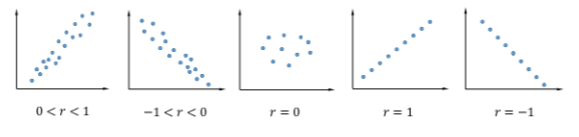

The correlation coefficients of x and y for several data sets. Note that the correlation reflects the strength and direction of a linear relationship, but not the slope of that relationship, nor many aspects of nonlinear relationships.

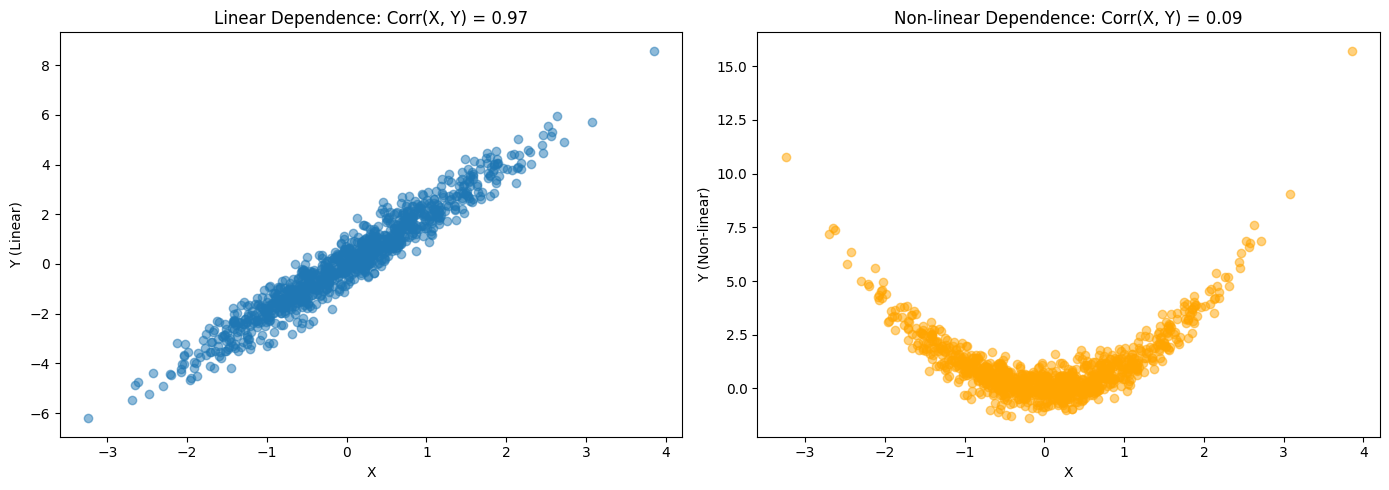

Correlation between X and Y (Linear): 0.97
Correlation between X and Y (Non-linear): 0.09


In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Random samples for X
n_samples = 1000
X = np.random.normal(0, 1, n_samples)

# Generate Y as linear function of X with some noise
# Y = 2*X + noise
noise = np.random.normal(0, 0.5, n_samples)
Y_linear = 2 * X + noise

# Generate Y as non-linear function of X
# Y = X^2 + noise
Y_nonlinear = X**2 + noise

# Calculate Pearson correlation coefficient for linear dependence
corr_linear, _ = pearsonr(X, Y_linear)

# Calculate Pearson correlation coefficient for non-linear dependence
corr_nonlinear, _ = pearsonr(X, Y_nonlinear)

# Plot the two cases
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot linear dependence
axes[0].scatter(X, Y_linear, alpha=0.5)
axes[0].set_title(f"Linear Dependence: Corr(X, Y) = {corr_linear:.2f}")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y (Linear)")

# Plot non-linear dependence
axes[1].scatter(X, Y_nonlinear, alpha=0.5, color="orange")
axes[1].set_title(f"Non-linear Dependence: Corr(X, Y) = {corr_nonlinear:.2f}")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y (Non-linear)")

plt.tight_layout()
plt.show()

# Display correlation results
print(f"Correlation between X and Y (Linear): {corr_linear:.2f}")
print(f"Correlation between X and Y (Non-linear): {corr_nonlinear:.2f}")


# 2.3.3. Random samples
A simple random sample is a randomly selected subset of a population and often is used in practice.


The random variable’s X1, X2, . . . , Xn are said to form a (simple) random sample of size n if
1. The X_i ’s are independent random variable’s .
2. Every X_i has the same probability distribution.

We can draw conclusions about the population mean μ using the sample mean  ̄X = 1 n (X1 + · · · + Xn). Some of the most frequently used inferential procedures are based on properties of the sampling distribution of  ̄X. We review these relationships between E(  ̄X) and μ and also among V (  ̄X), σ^2, and n.

Let X1, X2, . . . , Xn be a random sample from a distribution
with mean value μ and standard deviation σ . Then
1. E(  ̄X) =
μ  ̄X =
μ
2. V (  ̄X) =
σ 2
 ̄X =
σ 2/n and
σ  ̄X =
σ /√n

The central limit theorem (CLT) indicates that the properly normalized sum
of independent random variables tends toward a normal distribution even if
the original variables themselves are not normally distributed. The theorem is
a key concept in probability theory because it implies that probabilistic and
statistical methods that work for normal distributions can be applicable to
many problems involving other types of distributions. The formal statement
of this result is the most important theorem of probability.

Let X1, X2, . . . , Xn be a
random sample from a distribution with mean
μ and variance
σ 2. Then if n
is suﬀiciently large,  ̄X has approximately a normal distribution with
μ  ̄X =
μ
and
σ 2
 ̄X =
σ 2/n, and To also has approximately a normal distribution with
μTo = n
μ,
σ 2
To = n
σ 2. The larger the value of n, the better the approximation.




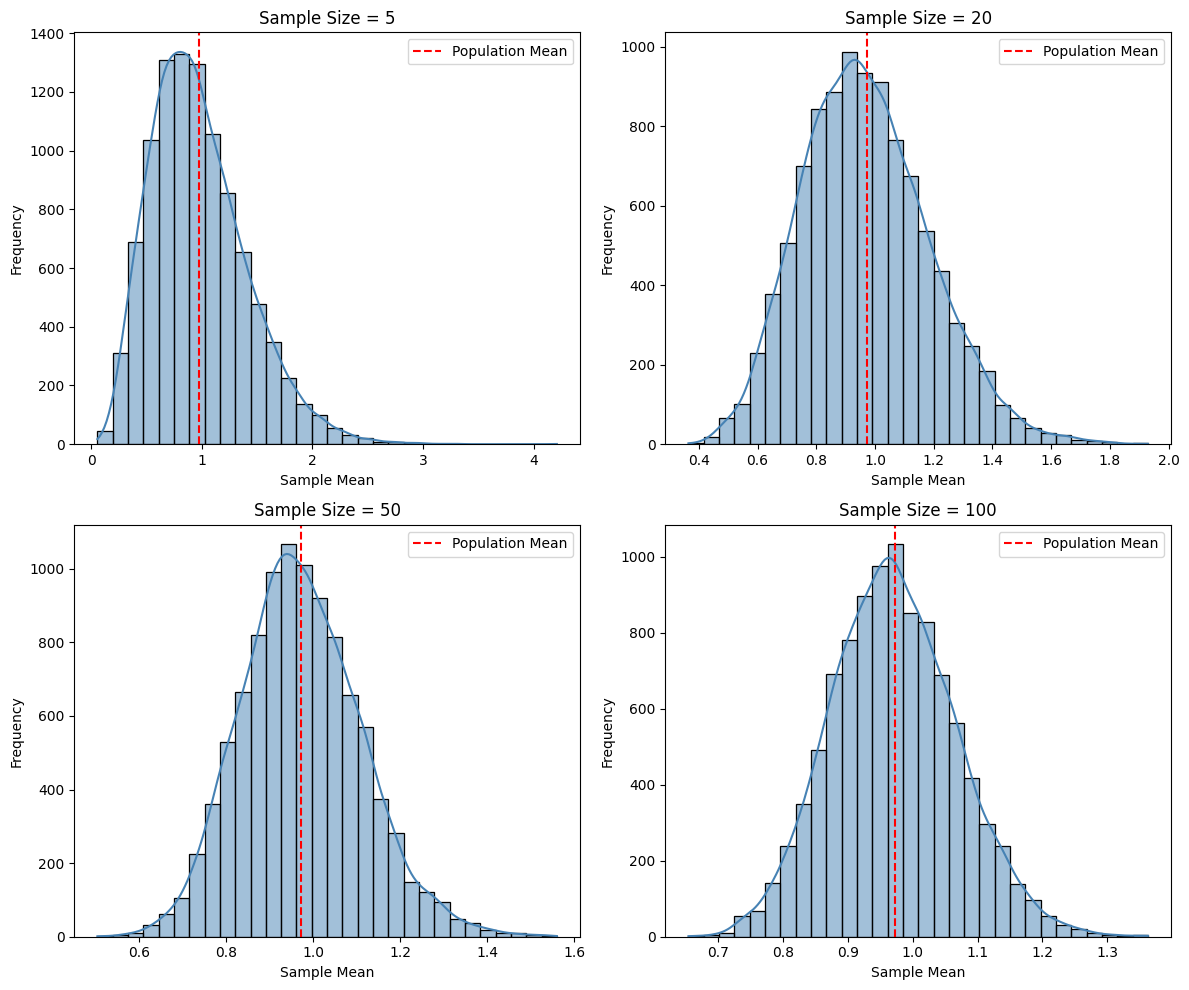

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the population distribution
n_samples = 1000
n_repeats = 10000
pop_scale = 1.0  # Scale parameter for population distribution

# Generate random samples from non-normal distribution
pop = np.random.exponential(scale=pop_scale, size=n_samples)

# Demonstrate CLT by taking repeated samples and calculating their means
sample_sizes = [5, 20, 50, 100]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, n in enumerate(sample_sizes):
    # Draw n repeated samples and calculate mean for each
    sample_means = [np.mean(np.random.choice(pop, size=n)) for _ in range(n_repeats)]

    # Plot histogram of sample means
    sns.histplot(sample_means, bins=30, kde=True, ax=axes[i], color="steelblue")
    axes[i].set_title(f"Sample Size = {n}")
    axes[i].set_xlabel("Sample Mean")
    axes[i].set_ylabel("Frequency")
    axes[i].axvline(np.mean(pop), color='r', linestyle='--', label='Population Mean')
    axes[i].legend()

plt.tight_layout()
plt.show()
